## Example detector optimiziation using DarkOpt

Caleb Fink

In [1]:
import numpy as np
import darkopt as dark # can import either entire package
from darkopt import materials, optimize # or import submodules seperately 
import darkopt.plotting as plot

The code structure follows that of a detector. A `Detector` object is composed of an `Absorber` object and a `QET` object. A `QET` is composed of at `TES` object. `Absorber`, `QET`, and `TES` objects have material properties that are passed from `darkopt.materials`. 

A `Detector` object can be created by making all these objects, or can be made in one step using `darkobp.create_detector()`, as shown below

In [2]:
# Set some initial parameters
l = 140e-6 
w = 2.5e-06
l_overlap = 20e-6
n_fins = 6
sigma = 220000000.0
t0 = 40e-3
res_n = 0.23999999999999996
res_n = 1
con_type= 'ellipse'
#con_type= 'modern'
l_f = 150e-6 * 0.9
h_fin = 300e-9# 9e-07
ahole = 4.9e-11

# create absorber 
absorber = dark.Absorber(name="Si", shape= "square",
                    height= 1e-3, width=1e-2,  w_safety=3e-3)
# create tes
tes = dark.TES(length=l,
       width=w, 
       l_overlap = l_overlap,
       n_fin=n_fins,
       sigma=sigma,
       rn=res_n,
       rsh = 5e-3,
       rp = 6e-3,   
   L_tot= 5e-08,)

# create qet
qet = dark.QET(l_fin=l_f, h_fin=h_fin, TES=tes, ahole=ahole, type_qp_eff=0)

# create detector
det = dark.Detector(absorber, qet)



All of these classes have printing methods to display values

In [3]:
tes.print()
qet.print()
det.print()

---------------- TES PARAMETERS ----------------
sigma = 220000000.0
wTc =  0.0001212666209673604
Tc =  0.04
rho =  9.599999999999999e-08
t =  4e-08
l =  0.00014
w =  2.5e-06
foverlap =  0.90625
res1tes =  134.39999999999995
n_fin =  6
vol1TES =  1.4e-17
vol1 =  1.0747062500000001e-16
Zeta = 0.1152542024049024
Max TES length before phase sep = 0.00023985182359762488 [m]
Is TES phase seperated = False
nTES =  135
tot_volume =  1.4508534375000002e-14
K =  3.1918775625000006e-06 
volFinCon =  4.8599999999999996e-18
WAlOverlap =  1.9820850000000002e-16
veff_WFinCon =  0.88
veff_WAloverlap =  0.45
Rn =  1
R0 =  0.45
fOp =  0.45
P0 =  3.260322682003898e-13
L =  5e-08
tau_el = 1.0845986984815617e-07
tau_etf = 5.329154500534981e-05
tau_0 = 0.0037312448195992234
tau_+ = 1.0890871060375646e-07
tau_- = 5.307191686730087e-05
------------------------------------------------

---------------- QET PARAMETERS ----------------
ePQP =  0.52
eQPabsb = 0.529845898704615
lfin =  0.000135
hfin =  3e-07
love

The noise can be plotted as well as the energy resolution calulated

Expected Energy Resolusion is: 308.4 [meV]


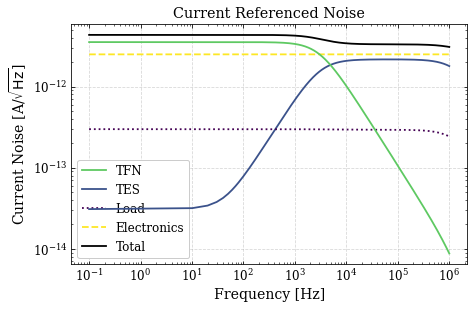

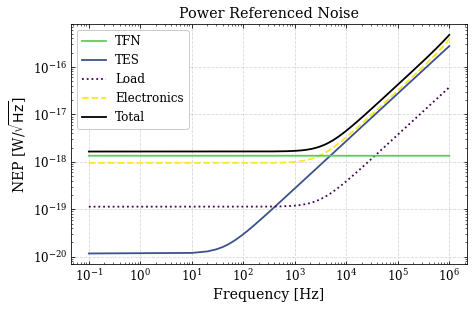

In [4]:
det.plot_si()
det.plot_sp()
print(f'Expected Energy Resolusion is: {det.calc_res()*1e3:.1f} [meV]')

The detector responsivity can also be plotted


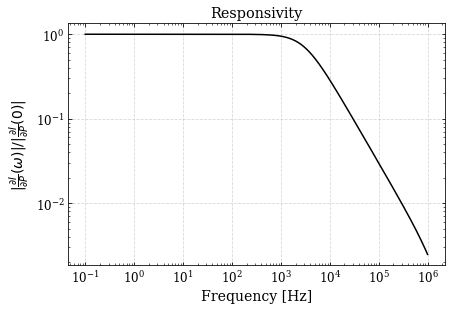

In [5]:
det.plot_responsivity()

## Optimization

Also, the optimum QET/TES parameters can be found by minimizing the energy resolution using `darkopt.optimize.optimize_detector()`. There is the option to enforce a desired total Al surface area covered by passing a value to the parameter `per_Al`. By default this is set to `None` and the Al coverage will be allowed to float free in the optimization

In [6]:
desired_coverage = 0.001

det_opt, eres, params = optimize.optimize_detector(tes_length0=l,
    tes_l_overlap0=l_overlap,
    n_fin0=n_fins,
    l_fin0=l_f,
    h_fin0=h_fin,
    per_Al = desired_coverage,                               
    tes_width=w,
    abs_type="Si", 
    abs_shape="square", 
    abs_height=1e-3, 
    abs_width=1e-2, 
    w_safety=3e-3,
    sigma=sigma,
    rn=res_n,
    rp=6e-3,
    L_tot=5e-08,
    ahole=ahole,)


resolution: 316.8 [meV]
TES Length = 59.1 [μm]
Overlap Legth = 10.1 [μm]
Fin Length = 61.7 [μm]
Fin Height = 1.0 [μm]
N Fins = 6
Total Al surface coverage = 0.155 [%]
Absolute phonon collection energy efficiency = 12.62 [%]
Number of TESs = 12
Close Packed: False
---------------------------------
Phase margin = 406.1 [%] (phase_sep_legth - tes_legnth)/tes_legnth)


## Visualization

The energy resolution, total phonon efficiency, phonon collection time constant, and electrothermal feedback time constants can all be plotted as 2D plots of any combination of the optimization parameters. An initialized `Detector` object is passed to the plotting along with arrays of values to plot agaist